In [1]:
import pandas as pd

In [10]:
# Load DF
df = pd.read_csv('CO2 Emissions_Canada.csv')
# Create Binary Variable for transmissions
df['man'] = df.Transmission.apply(lambda x: 1 if x.startswith('M') else 0)

In [11]:
# Drop duplicates. We keep one copy of manual and automatic per vehicle.
df= df.drop_duplicates(subset=['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'man'], keep= 'last')

In [13]:
# Create a bool mask that labels cars with duplicates True. Notice how we exclude 'man' when identifying duplicates.
dupes = df.duplicated(subset=['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders'], keep = False)
dupes.head(20)

3     False
6     False
7      True
8      True
9      True
10     True
11    False
14    False
19    False
38    False
69    False
70    False
71    False
72    False
73    False
81     True
82     True
86     True
87     True
88     True
dtype: bool

In [14]:
# We want to keep only duplicated cars because each duplicate set contains a manual and a automatic version of a vehicle. 
df = df[dupes == True]
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),man
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255,0
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267,1
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212,0
10,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225,1
81,BMW,328i,COMPACT,2.0,4,A8,Z,10.0,6.5,8.4,34,193,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203,1
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162,0
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163,1
7368,VOLKSWAGEN,Jetta GLI,COMPACT,2.0,4,AM7,X,9.3,7.2,8.4,34,196,0


In [17]:
# See how we have the same number of manual and automatic cars now?
df.groupby('man').agg({'man':'count'})

,man
man,
0,477
1,477


In [ ]:
# Lets see if we can identify a copy of a vehicle for each class.


In [18]:
# df['id'] = df.Make + df.Model + df['Vehicle Class'] + str(df['Engine Size(L)'])
df[(df.Model == 'ILX') & (df['Engine Size(L)'] ==2.4)]
# Perfect. We have two entries for Acura ILX 2.4L 4 cyl. One auto and one manual transmission.

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),man
1072,ACURA,ILX,COMPACT,2.4,4,M6,Z,10.8,7.4,9.3,30,214,1
6503,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,0


In [23]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),man
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255,0
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267,1
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212,0
10,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225,1
81,BMW,328i,COMPACT,2.0,4,A8,Z,10.0,6.5,8.4,34,193,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203,1
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162,0
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163,1
7368,VOLKSWAGEN,Jetta GLI,COMPACT,2.0,4,AM7,X,9.3,7.2,8.4,34,196,0


In [20]:
import matplotlib.pyplot as plt

In [28]:
# plt.plot(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], marker = 'o', linestyle = '', c = df['man'])

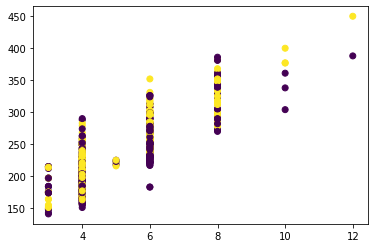

In [27]:
fig = plt.plot()
plt.scatter(data = df, x = 'Cylinders', y = 'CO2 Emissions(g/km)', c = 'man')